# Exercise - Unconstrained Optimization

## Data

All the analysis below applies to the data set,
* `data/spx_weekly_returns.xlsx`
* The file has **weekly** returns.
* For annualization, use 52 periods per year.

Consider only the following 10 stocks...

In [1]:
TICKS =  ['AAPL','NVDA','MSFT','GOOGL','AMZN','META','TSLA','AVGO','BRK/B','LLY']

As well as the ETF,

In [2]:
TICK_ETF = 'SPY'

### Data Processing

In [3]:
import pandas as pd

In [4]:
INFILE = '../data/spx_returns_weekly.xlsx'
SHEET_INFO = 's&p500 names'
SHEET_RETURNS = 's&p500 rets'
SHEET_BENCH = 'benchmark rets'

FREQ = 52

In [5]:
info = pd.read_excel(INFILE,sheet_name=SHEET_INFO)
info.set_index('ticker',inplace=True)
info.loc[TICKS]

,name,mkt cap
ticker,,
AAPL,Apple Inc,3.008822e+12
NVDA,NVIDIA Corp,3.480172e+12
MSFT,Microsoft Corp,3.513735e+12
GOOGL,Alphabet Inc,2.145918e+12
AMZN,Amazon.com Inc,2.303536e+12
META,Meta Platforms Inc,1.745094e+12
TSLA,Tesla Inc,9.939227e+11
AVGO,Broadcom Inc,1.148592e+12
BRK/B,Berkshire Hathaway Inc,1.064240e+12


In [6]:
rets = pd.read_excel(INFILE,sheet_name=SHEET_RETURNS)
rets.set_index('date',inplace=True)
rets = rets[TICKS]

In [7]:
bench = pd.read_excel(INFILE,sheet_name=SHEET_BENCH)
bench.set_index('date',inplace=True)
rets[TICK_ETF] = bench[TICK_ETF]

***

# 1. Risk Statistics

### 1.1.

Display a table with the following metrics for each of the return series.

* mean (annualized)
* volatility (annualized)
* Sharpe ratio (annualized)
* skewness
* kurtosis
* maximum drawdown

#### Note
We  have total returns, and Sharpe ratio is technically defined for excess returns. Don't worry about the difference. (Or subtract `SHV` if you prefer.)

### 1.2.

As a standalone investment, which is most attractive? And least? Justify your answer.

### 1.3.

For each investment, estimate a regression against `SPY`. Report the 
* alpha (annualized as a mean)
* beta
* info ratio
* r-squared

Based on this table, which investment seems most attractive relative to holding `SPY`?

***

# 2. Portfolio Allocation

### 2.1.

Display the correlation matrix of the returns.

* Based on this information, which investment do you anticipate will get extra weight in the portfolio, beyond what it would merit for its mean return?

* Report the maximally correlated assets and the minimally correlated assets.

<Axes: >

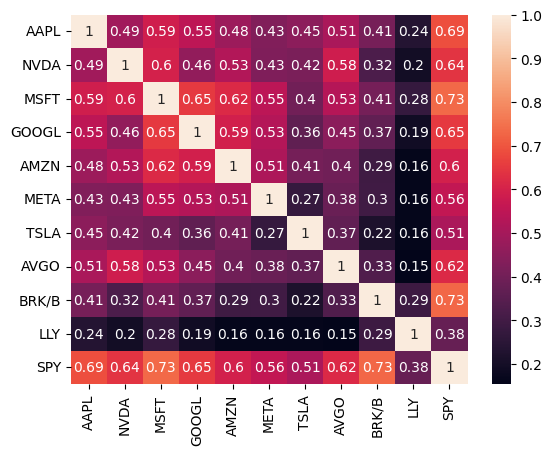

In [12]:
import seaborn as sns

cor = rets.corr()
sns.heatmap(cor, annot=True)

LLY should get extra weights since its correlation with other stocks is low, good for diversification.

In [21]:
import numpy as np

def get_pair(cor, type="max"):
    if type == "max":
        np.fill_diagonal(cor.values, -1)
        idx, col = cor.stack().idxmax()
        print(f"Max. value: {cor.values.max()}, pair: {idx}-{col}")
    elif type == "min":
        np.fill_diagonal(cor.values, 1)
        idx, col = cor.stack().idxmin()
        print(f"Min. value: {cor.values.min()}, pair: {idx}-{col}")

In [22]:
get_pair(cor, "max")
get_pair(cor, "min")

Max. value: 0.7345076267610018, pair: MSFT-SPY
Min. value: 0.15398756373624256, pair: AVGO-LLY


### 2.2.

Calculate the weights of the mean-variance optimized portfolio, also called the tangency portfolio.

* Display a table indexed by each investment, with the optimal weights in one column and the Sharpe ratios in another column.

* Do the investments with the best Sharpe ratios tend to get the biggest weights?

#### Note:
To estimate the optimal weights, consider using the provided function below.

In [23]:
def optimized_weights(returns,dropna=True,scale_cov=1):
    if dropna:
        returns = returns.dropna()

    covmat_full = returns.cov()
    covmat_diag = np.diag(np.diag(covmat_full))
    covmat = scale_cov * covmat_full + (1-scale_cov) * covmat_diag

    weights = np.linalg.solve(covmat,returns.mean())
    weights = weights / weights.sum()

    if returns.mean() @ weights < 0:
        weights = -weights

    return pd.DataFrame(weights, index=returns.columns)

By dropping SPY, ...

### 2.3.

Report the following performance statistics of the portfolio achieved with the optimized weights calculated above.
* mean
* volatility
* Sharpe

(Annualize all three statistics.)

### 2.4.

Try dropping the asset which had the biggest short position from the investment set. Re-run the optimization. What do you think of these new weights compared to the original optimized weights?

What is going on?

****